### 1.Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax

### 2.Loading Data

In [2]:
data = pd.read_csv(r'C:\Users\G.SAI KRISHNA\Desktop\ML_Projects\ML_GFG\train.csv')

In [3]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


### 3.Data Preprocessing

In [5]:
#Handling Null Values
data = data.dropna(axis=0)

In [6]:
data['x'].max()

100.0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


### 4.Data Splitting

In [8]:
train_input = np.array(data.iloc[0:500,0]).reshape(500,1)
train_output = np.array(data.iloc[0:500,1]).reshape(500,1)

test_input = np.array(data.iloc[500:700,0]).reshape(199,1)
test_output = np.array(data.iloc[500:700,1]).reshape(199,1)

In [9]:
train_input.shape

(500, 1)

In [10]:
train_output.shape

(500, 1)

In [11]:
test_input.shape

(199, 1)

In [12]:
test_output.shape

(199, 1)

# <font color="green">5.Linear Regression</font>

## Train the Data
we should follow the sequence of steps:
- Forward Propagation
- Cost Function
- Backward Propagation
- Update Parameters

## Forward Propagation
#### f(x) = mx+c 
where m & c are the parameters that model will learn through training

In [13]:
def forward_propagation(train_input,parameters):
    m=parameters['m']
    c=parameters['c']
    
    predictions = np.multiply(m,train_input) + c
    return predictions

## Cost Function
#### cost = ((y - f(x))^2)/2n
where y is the actual value and f(x) is the predicted value

In [14]:
def cost_function(predictions,train_output):
    cost = np.mean((predictions - train_output)**2) * 0.5
    return cost

## Back Propagation
Using Chain Rule
- cost
- f=f(x)

Partial Derivative of cost wrt m is dcost/dm = dcost/df * df/dm
Partial Derivative of cost wrt c is dcost/dc = dcost/df * df/dc

- dcost/df = f-y
- df/dm = x
- df/dc = 1

In [15]:
def backward_propagation(train_input,train_output,predictions):
    derivatives = dict()
    df = predictions - train_output
    dm = np.mean(np.multiply(df,train_input))
    dc = np.mean(df)
    
    derivatives['dm']=dm
    derivatives['dc']=dc
    return derivatives

## Updating the parameters
- m' = m - learning_rate * dm
- c' = c - learning_rate * dc

In [16]:
def update_parameters(parameters,derivatives,learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

## Training

In [17]:
def train(train_input,train_output,learning_rate,iters):
    parameters = dict()
    parameters['m'] = np.random.uniform(0,1) * -1
    parameters['c'] = np.random.uniform(0,1) * -1
    
    plt.figure()
    loss = list()
    for i in range(iters):
        predictions = forward_propagation(train_input,parameters)
        
        cost = cost_function(predictions,train_output)
        
        loss.append(cost)
        
        #Plotting the graph
        fig,ax = plt.subplots()
        ax.plot(train_input,train_output,'+',label='original')
        ax.plot(train_input,predictions,'*',label='training')
        legend = ax.legend()
        plt.plot(train_input,train_output,'+')
        plt.plot(train_input,predictions,'*')
        plt.show()
        print('Iterations :'+str(i+1)+' Loss : '+str(cost))
        
        derivatives = backward_propagation(train_input,train_output,predictions)
        
        parameters = update_parameters(parameters,derivatives,learning_rate)
    return parameters,loss
        

<Figure size 432x288 with 0 Axes>

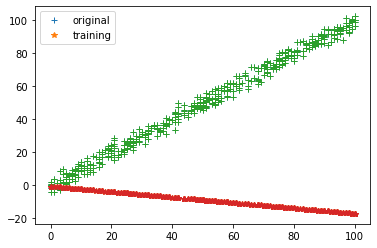

Iterations :1 Loss : 2253.2082111310947


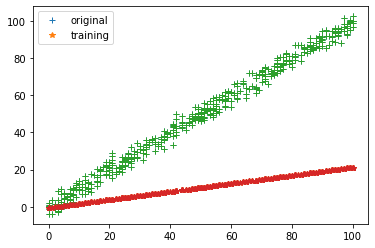

Iterations :2 Loss : 1024.4365777907324


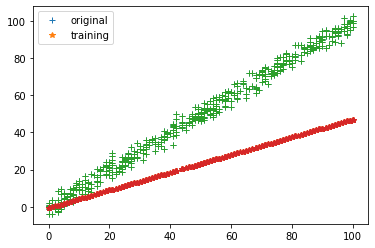

Iterations :3 Loss : 466.94152583509367


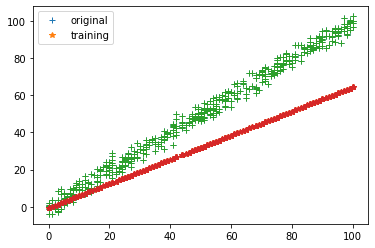

Iterations :4 Loss : 214.00540238735545


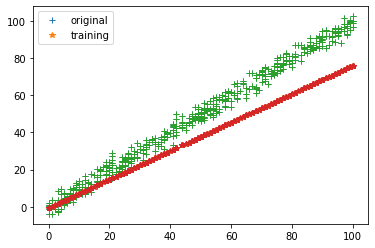

Iterations :5 Loss : 99.24800214571688


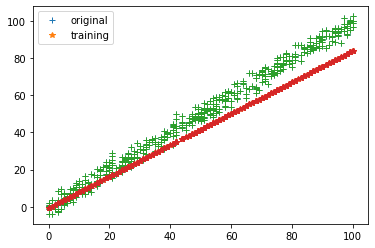

Iterations :6 Loss : 47.18244167517836


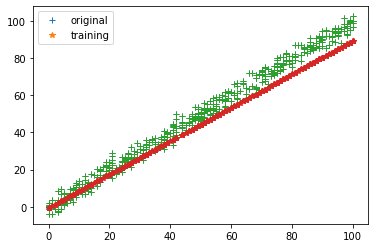

Iterations :7 Loss : 23.560238348897343


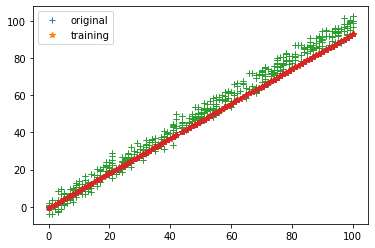

Iterations :8 Loss : 12.842817664044425


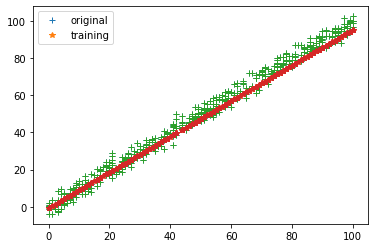

Iterations :9 Loss : 7.98031115752045


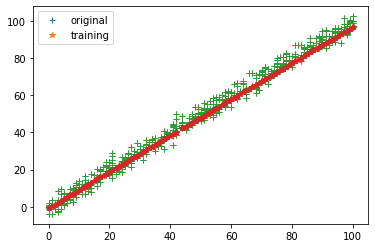

Iterations :10 Loss : 5.774185698892412


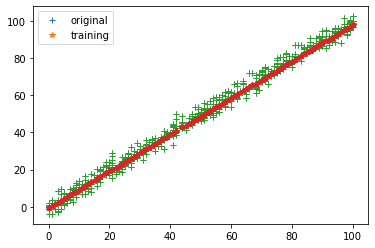

Iterations :11 Loss : 4.773263264055756


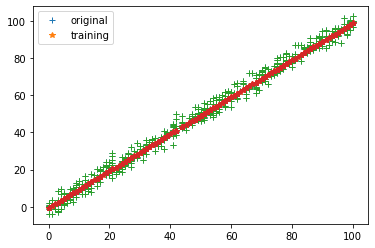

Iterations :12 Loss : 4.319142776089646


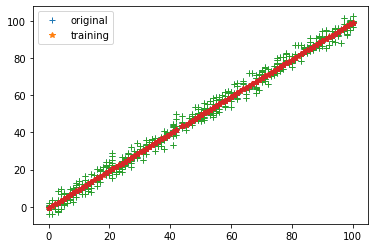

Iterations :13 Loss : 4.1131069371229225


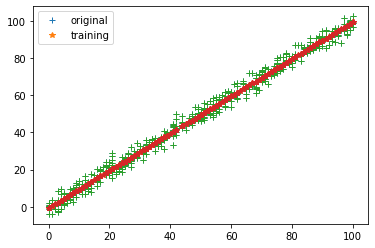

Iterations :14 Loss : 4.019627378239862


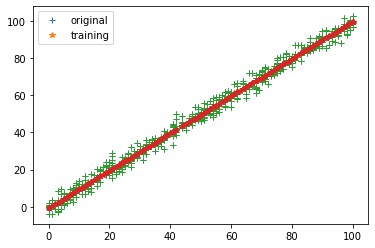

Iterations :15 Loss : 3.977214728346587


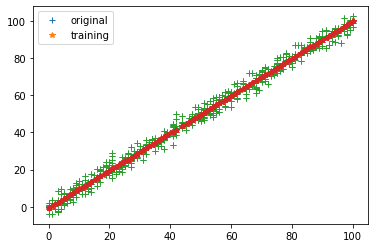

Iterations :16 Loss : 3.957971191669639


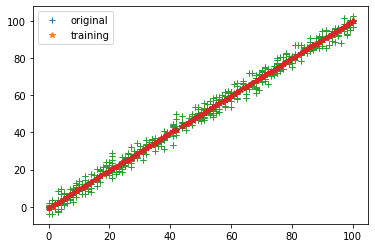

Iterations :17 Loss : 3.949239507365849


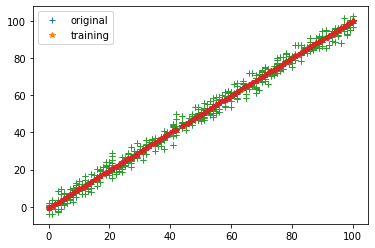

Iterations :18 Loss : 3.945277062170968


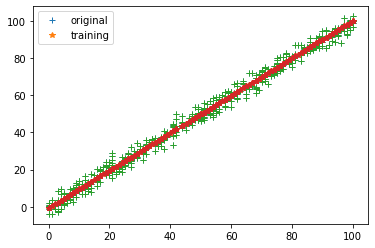

Iterations :19 Loss : 3.943478426086247


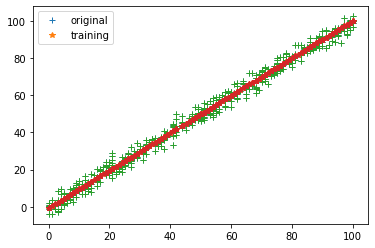

Iterations :20 Loss : 3.9426615126353712


In [18]:
parameters,loss = train(train_input,train_output,0.0001,20)

In [19]:
parameters

{'m': 1.0081519282056082, 'c': -0.7370844700656352}

## Predictions

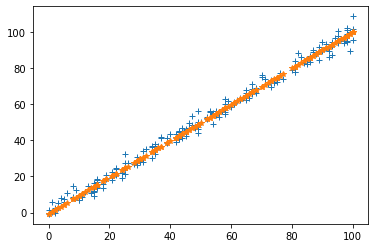

In [20]:
test_predictions = parameters['m'] * test_input + parameters['c']

plt.figure()
plt.plot(test_input,test_output,'+')
plt.plot(test_input,test_predictions,'*')
plt.show()

## Cost for test data

In [21]:
cost = cost_function(test_predictions,test_output)
print("Accuracy : "+str(100 - cost)+"%")

Accuracy : 95.89051369152943%
